# Over Time analisys
### Introductions 
- Purpose
  - Over Time analysis refers to the process of statistically analyzing assessment data to showing trends and and other characteristics relating to changes in data over time . Chart used in notebook. It include all Data science steps and below data presentations:
      - [Line chart for Control limits - https://leanscape.io/6-sigma-control-charts/ - Control charts are an essential tool used in Six Sigma to monitor process stability and improve quality. By understanding how control charts work, you can more effectively use them to improve your process and product quality](#Linechart1)
      - [Line chart for fastest growing trends in amount of vulnerabilities](#Linechart2)
  - Tags: [ "cve", "vulnerability", "exploits" ]
  - External resources: Shodan
  - Target audience: BlueTeam, Vulnerability management
  

# Playbook TOC
- [Data collection](#DataCollection)
- [Data Discovery](#DataDiscovery)
- [Data Cleansing](#DataCleaning)
- [Data Validation](#DataValidation)

In [37]:
import configparser
import pandas as pd
import psycopg2
from sqlalchemy import create_engine
from datetime import datetime

import matplotlib as plt
import matplotlib.pyplot as plt

from datetime import datetime, timedelta
import matplotlib.dates as mdates
from pandas import DataFrame
from random import randrange
import numpy as np
import plotly.express as px
import statistics as stats
%matplotlib inline

# Data Collection <a id="DataCollection"></a>

### Collection data from Postgresql DB previously feeded from by those scripts https://github.com/Tengrom/DataForVulnMan/tree/main/Tools

#### DB schema:
https://app.quickdatabasediagrams.com/#/d/wxCCR6
![Image of Yaktocat](https://lh3.googleusercontent.com/pw/AP1GczNSjRGHp7WPyv36qTv9uYJ_qPz8I9Yfp9HesPuVZOpRpfNy5D0wFQhN7KemicqvXsXUQsZPTDKCxFeUGKqCZ4cJOqVtC1z5pVIDpteOKBSe3y09OAEQgVMTkd3ghRcPKQUCnpwfnz_n89UCHyVrP65N_Q=w898-h536-s-no-gm?authuser=0)

In [38]:
    """Connect to the PostgreSQL database server"""
config = configparser.ConfigParser()
pathtoconfig = '/home/piotr/Documents/VulnDataMana.ini'
config.read(pathtoconfig)
POSTGRES_ADDRESS = config['POSTGRES']['hostname']
POSTGRES_PORT = '5432'
POSTGRES_USERNAME = config['POSTGRES']['username']
POSTGRES_PASSWORD = config['POSTGRES']['password']
POSTGRES_DBNAME  = config['POSTGRES']['database']
postgres_str = ('postgresql://{username}:{password}@{ipaddress}:{port}/{dbname}'.format(username=POSTGRES_USERNAME,password=POSTGRES_PASSWORD,ipaddress=POSTGRES_ADDRESS,port=POSTGRES_PORT,dbname=POSTGRES_DBNAME))
cnx = create_engine(postgres_str)


In [39]:
CL_df = pd.read_sql_query('''SELECT h.ip_address, hc.host_id, to_char( hc.detection_date, 'DD-MON-YYYY') as timestamp FROM host_cve  hc  JOIN hosts  h ON hc.host_id =  h.host_id order  by detection_date ;''', cnx)

trends_df = pd.read_sql_query('''SELECT hc.host_cve_id, hc.host_id, hc.cve_id, to_char( hc.detection_date, 'DD-MON-YYYY') as timestamp,c.cve_number, c.software_name, c.software_vendor  FROM host_cve hc JOIN cve c  ON hc.cve_id = c.cve_id order  by detection_date  ;''', cnx)

# Data Discovery <a id="DataDiscovery"></a>

In [40]:
CL_df

,ip_address,host_id,timestamp
0,194.1.144.5,2,27-NOV-2023
1,194.1.144.5,2,27-NOV-2023
2,194.1.144.5,2,27-NOV-2023
3,194.1.144.5,2,27-NOV-2023
4,194.1.144.5,2,27-NOV-2023
...,...,...,...
17012,31.128.15.21,96,04-JAN-2024
17013,31.128.15.21,96,04-JAN-2024
17014,31.128.15.21,96,04-JAN-2024
17015,31.128.15.21,96,04-JAN-2024


In [41]:
trends_df 

,host_cve_id,host_id,cve_id,timestamp,cve_number,software_name,software_vendor
0,1,2,1,27-NOV-2023,CVE-2019-19271,ProFTPD,None
1,2,2,2,27-NOV-2023,CVE-2019-19270,ProFTPD,None
2,3,2,3,27-NOV-2023,CVE-2010-4652,ProFTPD,None
3,4,2,4,27-NOV-2023,CVE-2010-3867,ProFTPD,None
4,5,2,5,27-NOV-2023,CVE-2011-4130,ProFTPD,None
...,...,...,...,...,...,...,...
17012,17013,96,9,04-JAN-2024,CVE-2019-18217,ProFTPD,None
17013,17014,96,10,04-JAN-2024,CVE-2019-12815,ProFTPD,None
17014,17015,96,11,04-JAN-2024,CVE-2008-7265,ProFTPD,None
17015,17016,96,12,04-JAN-2024,CVE-2012-6095,ProFTPD,None


In [42]:
CL_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17017 entries, 0 to 17016
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ip_address  17017 non-null  object
 1   host_id     17017 non-null  int64 
 2   timestamp   17017 non-null  object
dtypes: int64(1), object(2)
memory usage: 399.0+ KB


In [43]:
trends_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17017 entries, 0 to 17016
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   host_cve_id      17017 non-null  int64 
 1   host_id          17017 non-null  int64 
 2   cve_id           17017 non-null  int64 
 3   timestamp        17017 non-null  object
 4   cve_number       17017 non-null  object
 5   software_name    17017 non-null  object
 6   software_vendor  17017 non-null  object
dtypes: int64(3), object(4)
memory usage: 930.7+ KB


In [44]:
CL_df.describe()

,host_id
count,17017.00000
mean,48.94670
std,34.36769
min,2.00000
25%,22.00000
50%,46.00000
75%,69.00000
max,202.00000


In [45]:
CL_df.describe()

,host_id
count,17017.00000
mean,48.94670
std,34.36769
min,2.00000
25%,22.00000
50%,46.00000
75%,69.00000
max,202.00000


#   Data  cleaning <a id="DataCleaning"></a>

In [46]:
grouped_trends_df = trends_df.groupby(['timestamp','software_name'])['cve_number'].nunique().reset_index()
grouped_trends_df

,timestamp,software_name,cve_number
0,04-JAN-2024,Apache httpd,476
1,04-JAN-2024,IBM HTTP Server,1
2,04-JAN-2024,None,2
3,04-JAN-2024,ProFTPD,15
4,04-JAN-2024,nginx,7
5,20-DEC-2023,Apache httpd,465
6,20-DEC-2023,IBM HTTP Server,1
7,20-DEC-2023,None,2
8,20-DEC-2023,ProFTPD,15
9,21-DEC-2023,Apache httpd,228


In [47]:
grouped_trends_df = trends_df.groupby(['timestamp','software_name'])['cve_number'].nunique().reset_index()
grouped_trends_df = grouped_trends_df.drop([4,4])
grouped_trends_df

,timestamp,software_name,cve_number
0,04-JAN-2024,Apache httpd,476
1,04-JAN-2024,IBM HTTP Server,1
2,04-JAN-2024,None,2
3,04-JAN-2024,ProFTPD,15
5,20-DEC-2023,Apache httpd,465
6,20-DEC-2023,IBM HTTP Server,1
7,20-DEC-2023,None,2
8,20-DEC-2023,ProFTPD,15
9,21-DEC-2023,Apache httpd,228
10,21-DEC-2023,ProFTPD,13


In [48]:
grouped_trends_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, 0 to 13
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   timestamp      13 non-null     object
 1   software_name  13 non-null     object
 2   cve_number     13 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 416.0+ bytes


In [49]:
grouped_trends_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, 0 to 13
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   timestamp      13 non-null     object
 1   software_name  13 non-null     object
 2   cve_number     13 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 416.0+ bytes


In [50]:
grouped_trends_df['timestamp'] = pd.to_datetime(grouped_trends_df['timestamp'], format='%d-%b-%Y')
grouped_trends_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, 0 to 13
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   timestamp      13 non-null     datetime64[ns]
 1   software_name  13 non-null     object        
 2   cve_number     13 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 416.0+ bytes


In [51]:
grouped_trends_df

,timestamp,software_name,cve_number
0,2024-01-04,Apache httpd,476
1,2024-01-04,IBM HTTP Server,1
2,2024-01-04,None,2
3,2024-01-04,ProFTPD,15
5,2023-12-20,Apache httpd,465
6,2023-12-20,IBM HTTP Server,1
7,2023-12-20,None,2
8,2023-12-20,ProFTPD,15
9,2023-12-21,Apache httpd,228
10,2023-12-21,ProFTPD,13


In [52]:
pivot_df = grouped_trends_df.pivot(index='timestamp', columns='software_name', values='cve_number').reset_index()

pivot_df

software_name,timestamp,Apache httpd,IBM HTTP Server,None,ProFTPD
0,2023-11-27,471.0,NaN,2.0,15.0
1,2023-12-20,465.0,1.0,2.0,15.0
2,2023-12-21,228.0,NaN,NaN,13.0
3,2024-01-04,476.0,1.0,2.0,15.0


In [53]:
# you can delete lines with missing results or do interpolation. Regardless of what you choose, you will need to analyze why these shortcomings occur.
#df_clean = df3_T.dropna()
columns_to_interpolate = pivot_df.columns[1:]
pivot_df[columns_to_interpolate] = pivot_df[columns_to_interpolate].interpolate()
pivot_df.fillna(0, inplace=True)
pivot_df

software_name,timestamp,Apache httpd,IBM HTTP Server,None,ProFTPD
0,2023-11-27,471.0,0.0,2.0,15.0
1,2023-12-20,465.0,1.0,2.0,15.0
2,2023-12-21,228.0,1.0,2.0,13.0
3,2024-01-04,476.0,1.0,2.0,15.0


In [54]:
CL_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17017 entries, 0 to 17016
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ip_address  17017 non-null  object
 1   host_id     17017 non-null  int64 
 2   timestamp   17017 non-null  object
dtypes: int64(1), object(2)
memory usage: 399.0+ KB


In [55]:
CL_df['timestamp'] = pd.to_datetime(CL_df['timestamp'], format='%d-%b-%Y')
CL_df

,ip_address,host_id,timestamp
0,194.1.144.5,2,2023-11-27
1,194.1.144.5,2,2023-11-27
2,194.1.144.5,2,2023-11-27
3,194.1.144.5,2,2023-11-27
4,194.1.144.5,2,2023-11-27
...,...,...,...
17012,31.128.15.21,96,2024-01-04
17013,31.128.15.21,96,2024-01-04
17014,31.128.15.21,96,2024-01-04
17015,31.128.15.21,96,2024-01-04


In [56]:
CL_df['year'] = CL_df['timestamp'].dt.year
CL_df['year_month'] = CL_df['timestamp'].dt.to_period('M')

In [57]:
CL_df['month'] = CL_df['timestamp'].dt.month
CL_df

,ip_address,host_id,timestamp,year,year_month,month
0,194.1.144.5,2,2023-11-27,2023,2023-11,11
1,194.1.144.5,2,2023-11-27,2023,2023-11,11
2,194.1.144.5,2,2023-11-27,2023,2023-11,11
3,194.1.144.5,2,2023-11-27,2023,2023-11,11
4,194.1.144.5,2,2023-11-27,2023,2023-11,11
...,...,...,...,...,...,...
17012,31.128.15.21,96,2024-01-04,2024,2024-01,1
17013,31.128.15.21,96,2024-01-04,2024,2024-01,1
17014,31.128.15.21,96,2024-01-04,2024,2024-01,1
17015,31.128.15.21,96,2024-01-04,2024,2024-01,1


In [58]:
# decide what period should be the model period 
start_year = 2023
end_year = 2025
start_month = 0
end_month = 12
filtered_df = CL_df[
    (CL_df['year'] >= start_year) & (CL_df['year'] <= end_year) &
    (CL_df['month'] >= start_month) & (CL_df['month'] <= end_month)
]
filtered_df

,ip_address,host_id,timestamp,year,year_month,month
0,194.1.144.5,2,2023-11-27,2023,2023-11,11
1,194.1.144.5,2,2023-11-27,2023,2023-11,11
2,194.1.144.5,2,2023-11-27,2023,2023-11,11
3,194.1.144.5,2,2023-11-27,2023,2023-11,11
4,194.1.144.5,2,2023-11-27,2023,2023-11,11
...,...,...,...,...,...,...
17012,31.128.15.21,96,2024-01-04,2024,2024-01,1
17013,31.128.15.21,96,2024-01-04,2024,2024-01,1
17014,31.128.15.21,96,2024-01-04,2024,2024-01,1
17015,31.128.15.21,96,2024-01-04,2024,2024-01,1


In [59]:
grouped_df = filtered_df.groupby('year_month')['ip_address'].nunique().reset_index()

grouped_df

,year_month,ip_address
0,2023-11,53
1,2023-12,54
2,2024-01,52


# Data  Validation <a id="DataValidation"></a>

### Control Limits <a id="Linechart1"></a>

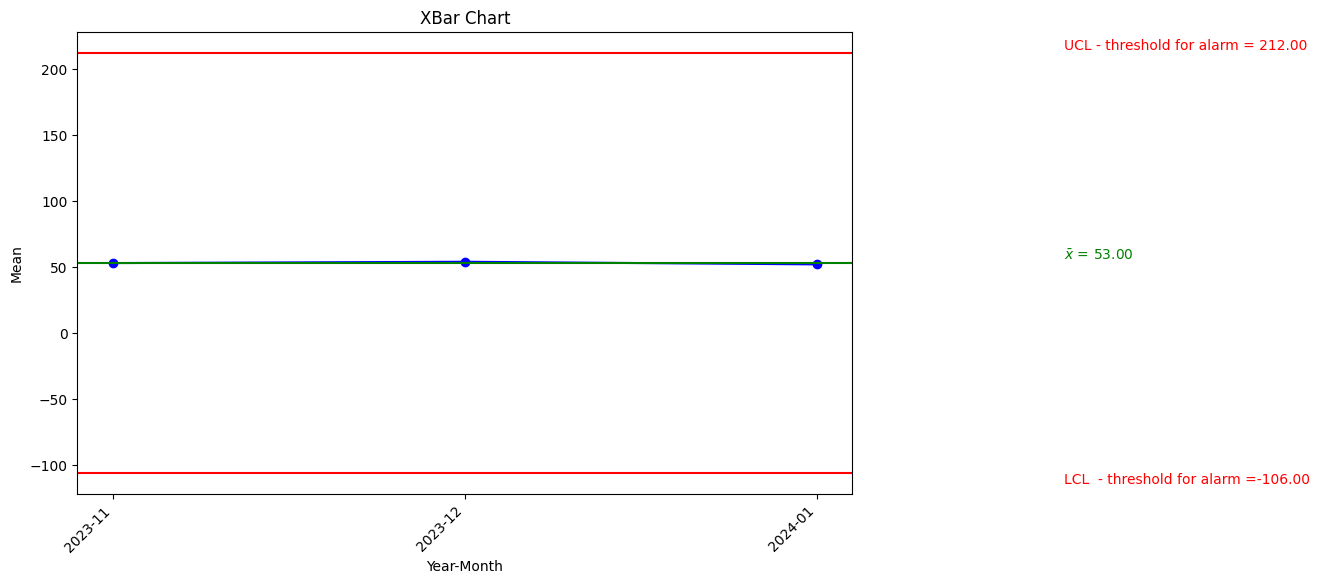

In [24]:
#https://www.isixsigma.com/dictionary/control-limits/
#https://bobby-j-williams.medium.com/python-and-process-control-part-1-db7b6dddfae8


# The historical mean for the process variable in question
process_mean = stats.mean(grouped_df['ip_address'].tolist())

# The historical standard variation for the process variable in question
process_stddev = stats.mean(grouped_df['ip_address'].tolist())

# Plot the XBar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Create the XBar chart
ax.plot(grouped_df['year_month'].astype(str), grouped_df['ip_address'], linestyle='-', marker='o', color='blue')

# Create the Upper Control Limit Line
UCL = process_mean + 3 * process_stddev
ax.axhline(UCL, color='red')

# Create the Lower Control Limit Line
LCL = process_mean - 3 * process_stddev
ax.axhline(LCL, color='red')

# Create the Xbar line
ax.axhline(process_mean, color='green')

# Create a chart title
ax.set_title('XBar Chart')

# Label the axes
ax.set(xlabel='Year-Month', ylabel='Mean')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Determine the y-axis limits in the chart to attach reference values
bottom, top = ax.get_ylim()
ax.text(len(grouped_df) - 0.3, UCL, "UCL - threshold for alarm = " + str("{:.2f}".format(UCL)), color='red', verticalalignment='bottom')
ax.text(len(grouped_df) - 0.3, process_mean, r'$\bar{x}$' + " = " + str("{:.2f}".format(process_mean)), color='green', verticalalignment='bottom')
ax.text(len(grouped_df) - 0.3, LCL, "LCL  - threshold for alarm =" + str("{:.2f}".format(LCL)), color='red', verticalalignment='top')

plt.show()

### Correlation

In [25]:
def trends(dx,start_date):
    df_trends = pd.DataFrame(columns=['cve', 'slope', 'nrms'])
    i=0
    for col in dx:
        
        #print(col)
        if col != "timestamp":
            trend_test = dx[[col,'timestamp']]
            fcdata = trend_test.set_index(['timestamp'])
            fcdata = fcdata.apply(lambda col:pd.to_numeric(col, errors='coerce'))
            fcdata
            selected = fcdata.loc[(start_date <=  fcdata.index),col]
            coefficients, residuals, _, _, _ = np.polyfit(range(len(selected.index)),selected,1,full=True)
            mse = residuals[0]/(len(selected.index))
            nrmse = np.sqrt(mse)/(selected.max() - selected.min())
            #print('Slope ' + str(coefficients[0]))
            #print('NRMSE: ' + str(nrmse))
            values = [coefficients[0],nrmse]
            df_trends.loc[i] = [col] + values
            i += 1
    return df_trends

In [26]:
df_trends  = trends(pivot_df,"2022-11-01")
df_trends

/tmp/ipykernel_244397/3421412185.py:15: RuntimeWarning: divide by zero encountered in scalar divide
  nrmse = np.sqrt(mse)/(selected.max() - selected.min())


,cve,slope,nrms
0,Apache httpd,-2.220000e+01,0.412010
1,IBM HTTP Server,3.000000e-01,0.273861
2,None,-1.642978e-16,inf
3,ProFTPD,-2.000000e-01,0.418330


In [27]:


summary_stats = df_trends.describe()

summary_stats 

,slope,nrms
count,4.000000,4.000000
mean,-5.525000,inf
std,11.118566,NaN
min,-22.200000,0.273861
25%,-5.700000,0.377473
50%,-0.100000,0.415170
75%,0.075000,inf
max,0.300000,inf


In [28]:
percentile_75 = summary_stats.loc['75%', 'slope']
percentile_75

0.07499999999999991

In [29]:
#The fastest increased vulnerabilities:
df_trends_increasing = df_trends.loc[(df_trends['slope'] < percentile_75)]
df_trends_increasing 

,cve,slope,nrms
0,Apache httpd,-2.220000e+01,0.41201
2,None,-1.642978e-16,inf
3,ProFTPD,-2.000000e-01,0.41833


In [66]:
columns_to_interpolate = df_trends_increasing['cve'].tolist()
columns_to_interpolate.insert(0,"timestamp")
pivot_df_trends_increasing = pivot_df[columns_to_interpolate]
pivot_df_trends_increasing 

software_name,timestamp,Apache httpd,None,ProFTPD
0,2023-11-27,471.0,2.0,15.0
1,2023-12-20,465.0,2.0,15.0
2,2023-12-21,228.0,2.0,13.0
3,2024-01-04,476.0,2.0,15.0


###  TRENDS <a id="Linechart2"></a>

In [35]:
def legend_positions(df, y):
    """ Calculate position of labels to the right in plot... """
    positions = {}
    for column in y:    
        positions[column] = df[column].values[-1] - 0.5    
    positions
    def push():
        """
        ...by puting them to the last y value and
        pushing until no overlap
        """
        collisions = 0
        for column1, value1 in positions.items():
            for column2, value2 in positions.items():
                if column1 != column2:
                    dist = abs(value1-value2)
                    if dist < 2.5:
                        collisions += 1
                        if value1 < value2:
                            positions[column1] -= .1
                            positions[column2] += .1
                        else:
                            positions[column1] += .1
                            positions[column2] -= .1
                        return True
    while True:
        pushed = push()
        if not pushed:
            break

    return positions

In [67]:
for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = '#212946'  # bluish dark grey
for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color']:
    plt.rcParams[param] = '0.9'  # very light grey
x = 'timestamp'

columns_data = pivot_df_trends_increasing .columns.values.tolist()
plt.rcParams['font.size'] = '50'
y = columns_data[1:]
positions = legend_positions(pivot_df_trends_increasing , y)
#print(positions)
f, ax = plt.subplots(figsize=(100,100))        
cmap = plt.cm.get_cmap('Paired', len(y))

for i, (column, position) in enumerate(positions.items()):

    # Get a color
    color = cmap(float(i)/(len(positions)))
    # Plot each line separatly so we can be explicit about color
    ax = pivot_df_trends_increasing.plot(x=x, y=column, legend=False, ax=ax, color=color, linewidth=20)
    
    # Add the text to the right
  
  
  
    plt.text(
        pivot_df_trends_increasing [x][pivot_df_trends_increasing[column].last_valid_index()],
        position , column, fontsize=100,
        color=color # Same color as line
    )
ax.set_ylabel('Number of IPs',  fontsize=100)
ax.set_xlabel('Date',  fontsize=100)
# Add percent signs
ax.grid(color='#2A3459',which='both', linewidth=10) 

ax.grid(True)
ax.set_facecolor("#212946")
ax.legend(fontsize=80,loc="lower center",ncol=8)

#ax.set_yticklabels(['{:3.0f}%'.format(x) for x in ax.get_yticks()])


/tmp/ipykernel_244397/255104689.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Paired', len(y))
